In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')


In [4]:
df=pd.read_csv(r'C:\Users\manas\OneDrive\Desktop\taxi data.csv')

In [5]:
df.head()

,Transaction ID,Date of Travel,Company,City,Passenger count,Distance Travelled(KM),Price Charged,Cost of Trip,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,7,30.45,370.95,313.635,Card
1,10000012,42375,Pink Cab,ATLANTA GA,7,28.62,358.52,334.854,Card
2,10000013,42371,Pink Cab,ATLANTA GA,2,9.04,125.20,97.632,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,7,33.17,377.40,351.602,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,6,8.73,114.62,97.776,Card


In [6]:
df.describe()

,Transaction ID,Date of Travel,Passenger count,Distance Travelled(KM),Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,4.498158,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,2.870179,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,0.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,2.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,4.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,7.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,9.000000,48.000000,2048.030000,691.200000


In [7]:
df.dtypes

Transaction ID              int64
Date of Travel              int64
Company                    object
City                       object
Passenger count             int64
Distance Travelled(KM)    float64
Price Charged             float64
Cost of Trip              float64
Payment_Mode               object
dtype: object

In [8]:
df['Date of Travel']=pd.to_datetime(df['Date of Travel'])
df

,Transaction ID,Date of Travel,Company,City,Passenger count,Distance Travelled(KM),Price Charged,Cost of Trip,Payment_Mode
0,10000011,1970-01-01 00:00:00.000042377,Pink Cab,ATLANTA GA,7,30.45,370.95,313.6350,Card
1,10000012,1970-01-01 00:00:00.000042375,Pink Cab,ATLANTA GA,7,28.62,358.52,334.8540,Card
2,10000013,1970-01-01 00:00:00.000042371,Pink Cab,ATLANTA GA,2,9.04,125.20,97.6320,Cash
3,10000014,1970-01-01 00:00:00.000042376,Pink Cab,ATLANTA GA,7,33.17,377.40,351.6020,Cash
4,10000015,1970-01-01 00:00:00.000042372,Pink Cab,ATLANTA GA,6,8.73,114.62,97.7760,Card
...,...,...,...,...,...,...,...,...,...
359387,10440101,1970-01-01 00:00:00.000043108,Yellow Cab,WASHINGTON DC,0,4.80,69.24,63.3600,Cash
359388,10440104,1970-01-01 00:00:00.000043104,Yellow Cab,WASHINGTON DC,6,8.40,113.75,106.8480,Cash
359389,10440105,1970-01-01 00:00:00.000043105,Yellow Cab,WASHINGTON DC,9,27.75,437.07,349.6500,Cash
359390,10440106,1970-01-01 00:00:00.000043105,Yellow Cab,WASHINGTON DC,4,8.80,146.19,114.0480,Card


In [9]:
df=df[['Date of Travel','Passenger count','Distance Travelled(KM)','Price Charged','Cost of Trip','Payment_Mode']]

In [17]:
df

,Date of Travel,Passenger count,Distance Travelled(KM),Price Charged,Cost of Trip,Payment_Mode
2,1970-01-01 00:00:00.000042371,2,9.04,125.20,97.6320,Cash
6,1970-01-01 00:00:00.000042372,2,44.00,576.15,475.2000,Card
8,1970-01-01 00:00:00.000042381,1,14.40,191.61,146.8800,Cash
9,1970-01-01 00:00:00.000042375,3,10.89,156.98,113.2560,Cash
10,1970-01-01 00:00:00.000042380,1,39.60,570.83,475.2000,Cash
...,...,...,...,...,...,...
359384,1970-01-01 00:00:00.000043105,2,21.84,358.77,285.6672,Cash
359385,1970-01-01 00:00:00.000043104,1,12.87,202.70,159.0732,Card
359386,1970-01-01 00:00:00.000043107,2,28.71,452.19,351.4104,Card
359390,1970-01-01 00:00:00.000043105,4,8.80,146.19,114.0480,Card


In [11]:
df['Passenger count'].value_counts(normalize=True)

2    0.101380
8    0.101043
5    0.100689
4    0.099952
0    0.099821
7    0.099710
1    0.099521
6    0.099507
3    0.099354
9    0.099023
Name: Passenger count, dtype: float64

In [12]:
df['Payment_Mode'].value_counts(normalize=True)

Card    0.599635
Cash    0.400365
Name: Payment_Mode, dtype: float64

In [15]:
# filtering the data based on passenger count between 0 to 6
df=df[(df['Passenger count']>0) & (df['Passenger count']<6)]

In [20]:
df


,Date of Travel,Passenger count,Distance Travelled(KM),Price Charged,Cost of Trip,Payment_Mode
2,1970-01-01 00:00:00.000042371,2,9.04,125.20,97.6320,Cash
6,1970-01-01 00:00:00.000042372,2,44.00,576.15,475.2000,Card
8,1970-01-01 00:00:00.000042381,1,14.40,191.61,146.8800,Cash
9,1970-01-01 00:00:00.000042375,3,10.89,156.98,113.2560,Cash
10,1970-01-01 00:00:00.000042380,1,39.60,570.83,475.2000,Cash
...,...,...,...,...,...,...
359384,1970-01-01 00:00:00.000043105,2,21.84,358.77,285.6672,Cash
359385,1970-01-01 00:00:00.000043104,1,12.87,202.70,159.0732,Card
359386,1970-01-01 00:00:00.000043107,2,28.71,452.19,351.4104,Card
359390,1970-01-01 00:00:00.000043105,4,8.80,146.19,114.0480,Card


In [22]:
df.describe()

,Passenger count,Distance Travelled(KM),Price Charged,Cost of Trip
count,180018.000000,180018.000000,180018.000000,180018.000000
mean,3.001816,22.551191,423.332516,286.055594
std,1.414485,12.254844,274.947522,158.318307
min,1.000000,1.900000,15.750000,19.000000
25%,2.000000,11.900000,205.440000,150.420000
50%,3.000000,22.440000,386.320000,282.500000
75%,4.000000,32.960000,583.340000,413.820000
max,5.000000,48.000000,2013.950000,691.200000


{'whiskers': [<matplotlib.lines.Line2D at 0x28889f47710>,
 'caps': [<matplotlib.lines.Line2D at 0x28889f74a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x288810fd990>],
 'medians': [<matplotlib.lines.Line2D at 0x28889f75e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x28889f74990>],
 'means': []}

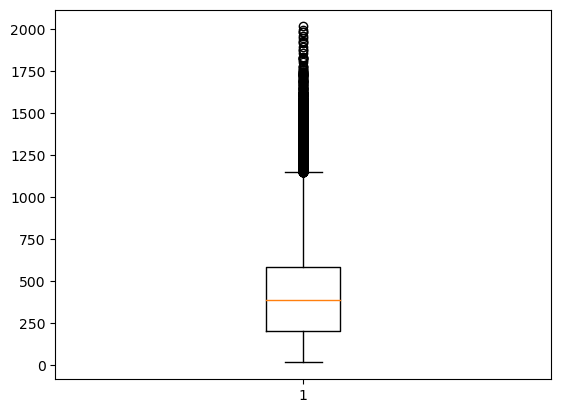

In [24]:
# checking the outliears
plt.boxplot(df['Price Charged'])


In [30]:
#finding the upperbond and lowerbond in data. And delting the outliears from data
for col in ['Price Charged','Distance Travelled(KM)']:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1
    lower_bond=q1-1.5*IQR
    Upper_bond=q1+1.5*IQR
    df=df[(df[col]>=lower_bond) & (df[col]<=Upper_bond)]
    

In [31]:
df

,Date of Travel,Passenger count,Distance Travelled(KM),Price Charged,Cost of Trip,Payment_Mode
2,1970-01-01 00:00:00.000042371,2,9.04,125.20,97.6320,Cash
8,1970-01-01 00:00:00.000042381,1,14.40,191.61,146.8800,Cash
9,1970-01-01 00:00:00.000042375,3,10.89,156.98,113.2560,Cash
10,1970-01-01 00:00:00.000042380,1,39.60,570.83,475.2000,Cash
11,1970-01-01 00:00:00.000042375,4,21.80,317.27,220.1800,Card
...,...,...,...,...,...,...
359384,1970-01-01 00:00:00.000043105,2,21.84,358.77,285.6672,Cash
359385,1970-01-01 00:00:00.000043104,1,12.87,202.70,159.0732,Card
359386,1970-01-01 00:00:00.000043107,2,28.71,452.19,351.4104,Card
359390,1970-01-01 00:00:00.000043105,4,8.80,146.19,114.0480,Card


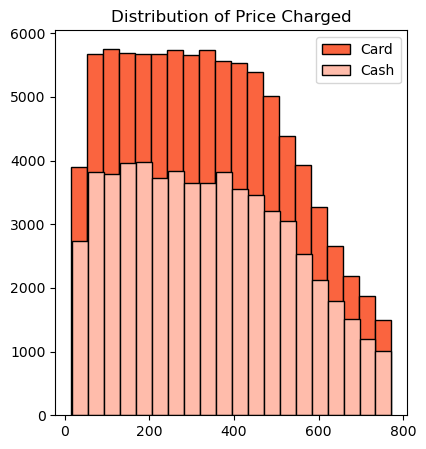

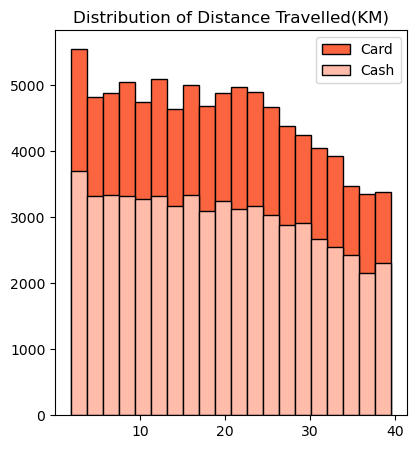

In [49]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Distribution of Price Charged')
plt.hist(df[df['Payment_Mode']=='Card']['Price Charged'],histtype='barstacked',bins=20,edgecolor='k',color='#FA643F',label='Card')
plt.hist(df[df['Payment_Mode']=='Cash']['Price Charged'],histtype='barstacked',bins=20,edgecolor='k',color='#FFBCAB',label='Cash')
plt.legend()
plt.show()


plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.title('Distribution of Distance Travelled(KM)')
plt.hist(df[df['Payment_Mode']=='Card']['Distance Travelled(KM)'],histtype='barstacked',bins=20,edgecolor='k',color='#FA643F',label='Card')
plt.hist(df[df['Payment_Mode']=='Cash']['Distance Travelled(KM)'],histtype='barstacked',bins=20,edgecolor='k',color='#FFBCAB',label='Cash')
plt.legend()
plt.show()

In [51]:
# Finding Mean and Std of price charge and Distance travelled
df.groupby('Payment_Mode').agg({'Price Charged':['mean','std'],'Distance Travelled(KM)':['mean','std']})


Price Charged             Distance Travelled(KM)           
                      mean         std                   mean        std
Payment_Mode                                                            
Card            340.068730  191.491378              19.467461  10.615451
Cash            338.790791  192.141280              19.414658  10.661284

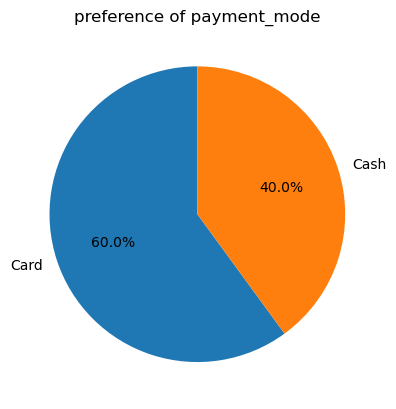

In [58]:
# calculating the percentage of payment mode usage
plt.title('preference of payment_mode')
plt.pie(df['Payment_Mode'].value_counts(normalize=True),labels=df['Payment_Mode'].value_counts().index,startangle=90,autopct='%1.1f%%')
plt.show()

In [ ]:
# Null Hypothesis:There is no difference between average price charged between who people are using card and who are using cash
# Alternative Hypothesis: There is a difference between average price charged between who people are using card and who are using cash

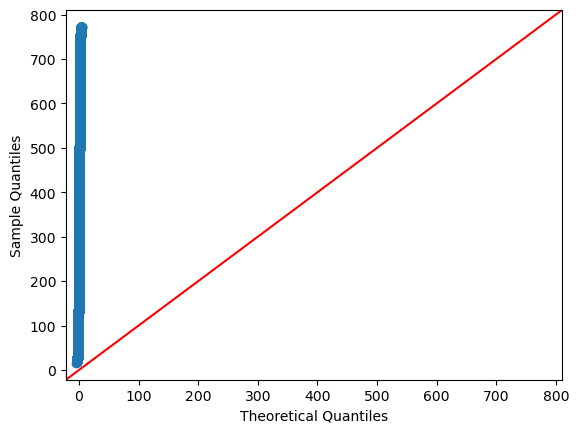

In [66]:
# Checking data follows normal distribution or not
sm.qqplot(df['Price Charged'],line='45')
plt.show()

In [69]:
Cardsample=df[df['Payment_Mode']=='Card']['Price Charged']
Cashsample=df[df['Payment_Mode']=='Cash']['Price Charged']

In [71]:
t_stats,p_value=st.ttest_ind(a=Cardsample,b=Cashsample)
print('Ttest_value:',t_stats,'p value:',p_value)

Ttest_value: 1.2692980822676714 p value: 0.2043367240544917


In [ ]:
#Since the p-value (0.2043) is greater than the significance level (𝛼=0.05α=0.05), we fail to reject the null hypothesis.
#There isn't strong evidence to suggest that the null hypothesis is incorrect based on the given data and the chosen significance level.